# Exploration

In [1]:
import time
import os
# os.environ["MKL_THREADING_LAYER"] = "GNU"
import keras
# import theano
import numpy as np
import pandas as pd
import decimal
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.utils import shuffle
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.metrics import mean_squared_error
# from scipy import stats

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

# print 'theano version:', theano.__version__
# print 'theano config device:', theano.config.device, theano.config.floatX
print('keras version:', keras.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

C:\Users\alexd\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


keras version: 2.2.4
pandas version: 0.23.0
numpy version: 1.14.3


In [5]:
test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')

test['Image'] = test.Image.apply(lambda im: np.fromstring(im, sep=' '))
train['Image'] = train.Image.apply(lambda im: np.fromstring(im, sep=' '))

In [6]:
train.iloc[:5,:5]

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x
0,66.033564,39.002274,30.227008,36.421678,59.582075
1,64.332936,34.970077,29.949277,33.448715,58.856170
2,65.057053,34.909642,30.903789,34.909642,59.412000
3,65.225739,37.261774,32.023096,37.261774,60.003339
4,66.725301,39.621261,32.244810,38.042032,58.565890


In [8]:
print(train.count())

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [9]:
train = train.dropna()
# train = train.sample(frac=1).reset_index(drop=True)
train_data = train.Image
train_labels = train[train.columns[:-1]]
train_data.shape, train_labels.shape

((2140,), (2140, 30))

In [10]:
idx = np.random.randint(0, len(train_data), 16)

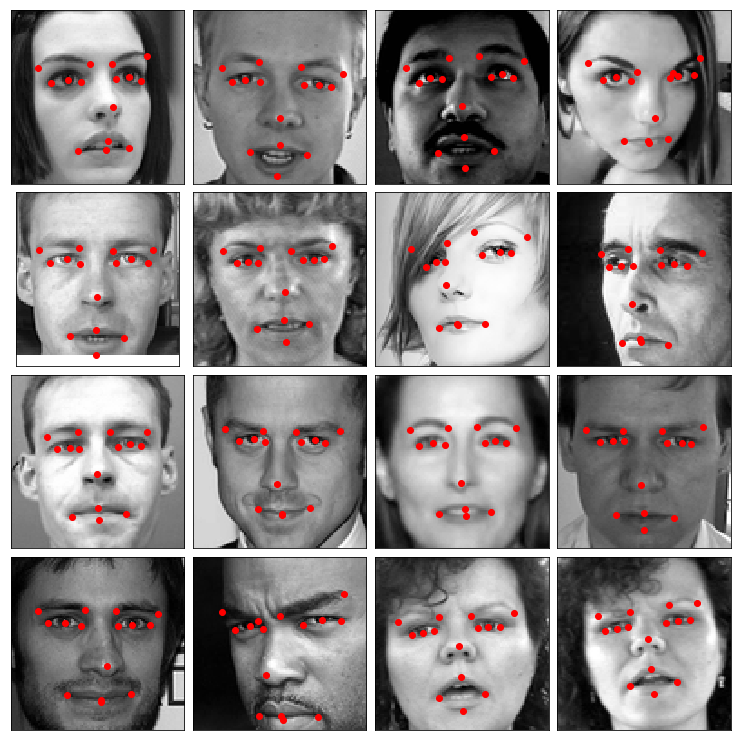

In [13]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i, loc in enumerate(idx):
    img = train_data.iloc[loc].reshape(96,96)
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(img, cmap='gray')
    for c in range(0, len(train_labels.columns)-1, 2):
        x = train_labels[train_labels.columns[c]].iloc[loc]
        y = train_labels[train_labels.columns[c+1]].iloc[loc]
        plt.scatter(x, y, c='r')

In [14]:
train_labels.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


# Attempting (and Failing) to make a CNN

In [15]:
# from __future__ import print_function
# import keras
# # from keras.datasets import mnist
# from keras.layers import Dense, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras.models import Sequential
# import matplotlib.pylab as plt

In [47]:
batch_size = 128
num_classes = 30
epochs = 10

# input image dimensions
img_x, img_y = 96,96

In [48]:
x_train = train_data
x_train.shape

(2140,)

In [49]:
x_train = x_train.apply(lambda im: im.reshape(96,96))
x_train.shape

(2140,)

In [50]:
x_train[0].shape

(96, 96)

In [51]:
img_x, img_y = x_train[0].shape

In [52]:
test.head()

,ImageId,Image
0,1,"[182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176..."
1,2,"[76.0, 87.0, 81.0, 72.0, 65.0, 59.0, 64.0, 76...."
2,3,"[177.0, 176.0, 174.0, 170.0, 169.0, 169.0, 168..."
3,4,"[176.0, 174.0, 174.0, 175.0, 174.0, 174.0, 176..."
4,5,"[50.0, 47.0, 44.0, 101.0, 144.0, 149.0, 120.0,..."


In [53]:
x_test = test.Image.apply(lambda im: im.reshape(96,96))
x_test.shape

(1783,)

In [116]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the image is greyscale, we only have a single channel - RGB colour images would have 3
x_train = np.stack(x_train, axis=0)
x_test = np.stack(x_test, axis=0)
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)
input_shape, x_train.shape, x_test.shape

((96, 96, 1), (2140, 96, 96, 1), (1783, 96, 96, 1))

In [56]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (2140, 96, 96, 1)
2140 train samples
1783 test samples


In [57]:
# # convert class vectors to binary class matrices - this is for use in the
# # categorical_crossentropy loss below
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# y_train.shape, y_test.shape

In [58]:
y_train = train_labels

In [62]:
y_train.shape

(2140, 30)

In [88]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [86]:
?model.compile

In [89]:
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(),
#               metrics=['accuracy'])
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(
    loss='mean_squared_error',
    optimizer=sgd
)

In [90]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [91]:
?model.fit

In [92]:
model.fit(x_train, y_train,
          batch_size=batch_size,
#           epochs=epochs,
          epochs=2,
          verbose=1,
#           validation_data=(x_test, y_test),
          callbacks=[history])
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])
# plt.plot(range(1, 11), history.acc)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.show()

Epoch 1/2
2140/2140 [==============================] - 67s 31ms/step - loss: 2613.6027
Epoch 2/2
2140/2140 [==============================] - 64s 30ms/step - loss: 2613.4060


In [93]:
pred = model.predict(x_test)

In [94]:
pred.shape

(1783, 30)

In [95]:
pred[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [70]:
idx = np.random.randint(0, len(x_test), 16)

In [73]:
x_test[0].reshape(96,96).shape

(96, 96)

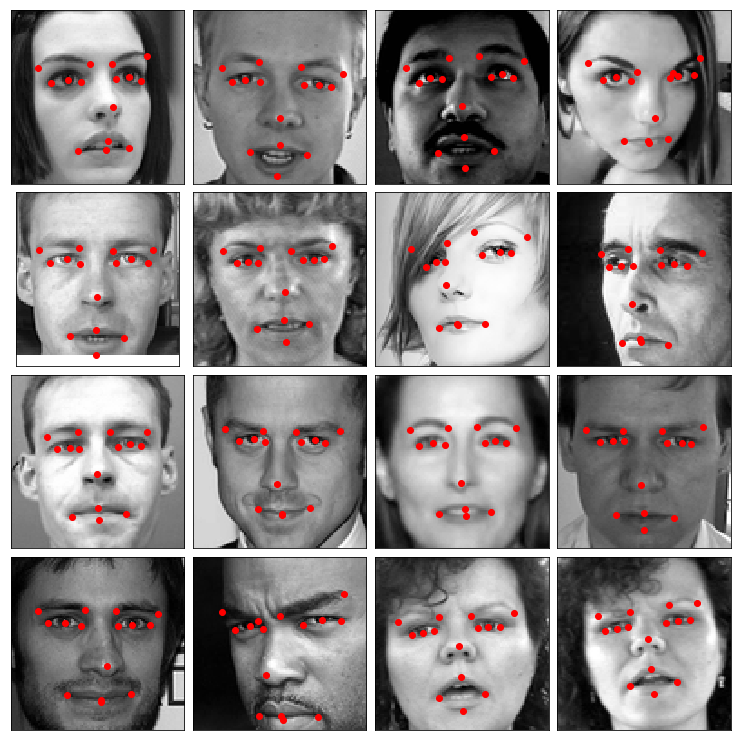

In [13]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i, loc in enumerate(idx):
    img = x_test.iloc[loc].reshape(96,96)
    ax = fig.add_subplot(4, 4, i + 1, axis='off')
    ax.imshow(img, cmap='gray')
    for c in range(0, len(pred.columns)-1, 2):
        x = train_labels[train_labels.columns[c]].iloc[loc]
        y = train_labels[train_labels.columns[c+1]].iloc[loc]
        plt.scatter(x, y, c='r')

# Recreate Daniel Nouri model in Keras

In [2]:
FTRAIN = 'training.csv'
FTEST = 'test.csv'

In [15]:
# from sklearn.utils import shuffle

# def load(test=False, cols=None):

#     fname = FTEST if test else FTRAIN
#     df = pd.read_csv(os.path.expanduser(fname))

#     df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

#     if cols:
#         df = df[list(cols) + ['Image']]

# #     print(df.count())
#     df = df.dropna()

#     X = np.vstack(df['Image'].values) / 255.
#     X = X.astype(np.float32)

#     if not test:
#         y = df[df.columns[:-1]].values
#         y = (y - 48) / 48
#         X, y = shuffle(X, y, random_state=42)
#         y = y.astype(np.float32)
#     else:
#         y = None

#     return X, y

In [16]:
# x,y = load()
# x.shape

In [17]:
# def load2d(test=False, cols=None):
#     X, y = load(test, cols)
#     X = X.reshape(-1, 1, 96, 96)
# #     X = X.reshape(-1, 96, 96, 1)
#     return X, y

In [18]:
# X, y = load2d()

In [19]:
# X.shape

In [6]:
# fname = FTEST if test else FTRAIN
# df = pd.read_csv(os.path.expanduser(fname))
# df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

# test = pd.read_csv('test.csv')
train = pd.read_csv('training.csv')

# test['Image'] = test.Image.apply(lambda im: np.fromstring(im, sep=' '))
train['Image'] = train.Image.apply(lambda im: np.fromstring(im, sep=' '))

# if cols:
#     df = df[list(cols) + ['Image']]t

#     print(df.count())
# df = df.dropna()

train = train.dropna()
# test.dropna()

# X = np.vstack(df['Image'].values) / 255.
# X = X.astype(np.float32)
train.shape

(2140, 31)

In [7]:
X = np.stack(train.Image.values) / 255
X.shape

(2140, 9216)

In [8]:
y = train[train.columns[:-1]].values
y = (y - 48) / 48
X, y = shuffle(X, y, random_state=42)
X.shape, y.shape

((2140, 9216), (2140, 30))

In [9]:
# X = X.reshape(-1, 1, 96, 96)
X = X.reshape(-1, 96, 96, 1)
X.shape, y.shape

((2140, 96, 96, 1), (2140, 30))

## Original Model

In [56]:
# making a callback so I can compare runtimes
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [81]:
model = Sequential()

# first group of layers
model.add(Conv2D(
    32, 
    kernel_size=(3,3), 
    activation='relu',
    input_shape=(96, 96, 1), 
#     data_format='channels_first'
))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second group of layers
model.add(Conv2D(
    64, 
    kernel_size=(2, 2), 
    activation='relu'
))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third group of layers
model.add(Conv2D(
    128, 
    kernel_size=(2, 2), 
    activation='relu'
))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(30))

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [82]:
time_callback = TimeHistory()
hist = model.fit(
    X, y, 
    batch_size=32,
    epochs=4,
    validation_split=0.2, 
    verbose=1,
    callbacks=[keras.callbacks.History(), time_callback]
)
print('RMS error on validation set:', np.sqrt(hist.history['val_loss'][-1]) * 48)
print('Total runtime (minutes):', round(np.sum(time_callback.times) / 60, 2))

Train on 1712 samples, validate on 428 samples
Epoch 1/4
1712/1712 [==============================] - 31s 18ms/step - loss: 0.0351 - val_loss: 0.0059
Epoch 2/4
1712/1712 [==============================] - 29s 17ms/step - loss: 0.0058 - val_loss: 0.0053
Epoch 3/4
1712/1712 [==============================] - 29s 17ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 4/4
1712/1712 [==============================] - 29s 17ms/step - loss: 0.0050 - val_loss: 0.0048
RMS error on validation set: 3.3239478821783166
Total runtime (minutes): 1.96


## Me trying to understand...

In [83]:
model = Sequential()

# FIRST CONVOLUTIONAL LAYER
model.add(Conv2D(
    filters=32, # don't yet fully understand how to choose this dimension
    kernel_size=(3,3),
    strides=(1,1),
    padding='same',
    activation='relu',
    input_shape=(96, 96, 1),
))
# input_shape = (batch, rows, cols, channels) --> (batch, 96, 96, 1)
# padding = 'same' so for a kernel of size (3,3) and strides=(1,1) this 
# will pad two rows and two columns of zeros on the edges so that the 
# output shape gives an tensor with 96 rows and 96 columns
# output_shape = (batch, new_rows, new_cols, filters) --> (batch, 96, 96, 32)

# POOLING LAYER
model.add(MaxPooling2D(
    pool_size=(2,2),
    strides=None
))
# setting strides=None sets the strides to a default of pool_size, so 
# here we are really setting strides=(2,2) which is what we want so we 
# don't miss any pixels and we don't count any pixels more than once
# the strides is essentially the factor by which to downscale the output
# so setting the strides=(2,2) will have the dimensions of input
# output_shape = (batch, in_rows/strides[0], in_cols/strides[1], filters) --> (batch, 48, 48, 32)


# SECOND CONVOLUTIONAL LAYER
model.add(Conv2D(
    filters=64, # don't know why we increased this number by 2
#     kernel_size=(2, 2),
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu'
))
# input_shape = (batch, pool_rows, pool_cols, in_filters) --> (batch, 48, 48, 32)
# output_shape = (batch, new_rows, new_cols, out_filters) --> (batch, 48, 48, 64)

# SECOND POOLING LAYER
model.add(MaxPooling2D(
    pool_size=(2, 2), 
    strides=None
))
# input_shape = (batch, in_rows, in_cols, filters) --> (batch, 48, 48, 64)
# output_shape = (batch, in_rows/strides[0], in_cols/strides[1], filters) --> (batch, 24, 24, 64)

# THIRD CONVOLUTIONAL LAYER
model.add(Conv2D(
    filters=128, # don't know how to choose this value
#     kernel_size=(2, 2),
    kernel_size=(3, 3),
    strides=(1,1),
    padding='same',
    activation='relu'
))
# input_shape = (batch, pool_rows, pool_cols, in_filters) --> (batch, 24, 24, 64)
# output_shape = (batch, new_rows, new_cols, out_filters) --> (batch, 24, 24, 128)

# THIRD POOLING LAYER
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=None
))
# input_shape = (batch, in_rows, in_cols, filters) --> (batch, 24, 24, 128)
# output_shape = (batch, in_rows/strides[0], in_cols/strides[1], filters) --> (batch, 12, 12, 128)

# FLATTEN THE POOLED OUTPUT TO CLASSIFY
model.add(Flatten())
# flatten the output into a single layer of 
#     shape = [batch, pool_rows * pool_cols * in_filters]
#         --> [batch, 12 * 12 * 128] = [batch, 18432]

# ADD ONE FULLY CONNECTED LAYER TO PROCESS THE FLATTENED DATA
model.add(Dense(
#     500,
    1000,
    activation='relu'
))
# input_shape = [batch, flattened_nodes] = [batch, 18432]
# output_shape = [batch, out_nodes] = [batch, 500]

# FINAL OUTPUT LAYER
model.add(Dense(30))
# input_shape = [batch, in_nodes] = [batch, 500]
# output_shape = [batch, num_classes] = [batch, 30]

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [84]:
time_callback = TimeHistory()
hist = model.fit(
    X, y, 
    batch_size=32,
    epochs=4, 
    validation_split=0.2, 
    verbose=1,
    callbacks=[keras.callbacks.History(), time_callback]
)
print('\nRMS error on validation set:', np.sqrt(hist.history['val_loss'][-1]) * 48)
print('Total runtime (minutes):', round(np.sum(time_callback.times) / 60, 2))

Train on 1712 samples, validate on 428 samples
Epoch 1/4
1712/1712 [==============================] - 58s 34ms/step - loss: 0.0267 - val_loss: 0.0065
Epoch 2/4
1712/1712 [==============================] - 62s 36ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 3/4
1712/1712 [==============================] - 54s 31ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 4/4
1712/1712 [==============================] - 49s 29ms/step - loss: 0.0047 - val_loss: 0.0045

RMS error on validation set: 3.232751889341982
Total runtime (minutes): 3.71


In [85]:
test = pd.read_csv('test.csv')
test['Image'] = test.Image.apply(lambda im: np.fromstring(im, sep=' '))
X_test = np.stack(test.Image.values) / 255
X_test = X_test.reshape(-1, 96, 96, 1)

In [86]:
pred = model.predict(X_test)
pred[0]

array([ 0.38076246, -0.2297017 , -0.38046277, -0.22430846,  0.2404773 ,
       -0.2123802 ,  0.5300429 , -0.22145489, -0.23735039, -0.20761654,
       -0.5299748 , -0.20588827,  0.1714838 , -0.40303862,  0.6677425 ,
       -0.37823904, -0.18328731, -0.3820169 , -0.6678924 , -0.37061352,
       -0.01040894,  0.1885454 ,  0.3135073 ,  0.5846345 , -0.3144979 ,
        0.60346645, -0.00718839,  0.510133  ,  0.00402809,  0.71731377],
      dtype=float32)

In [87]:
idx = np.random.randint(0, len(X_test), 16)

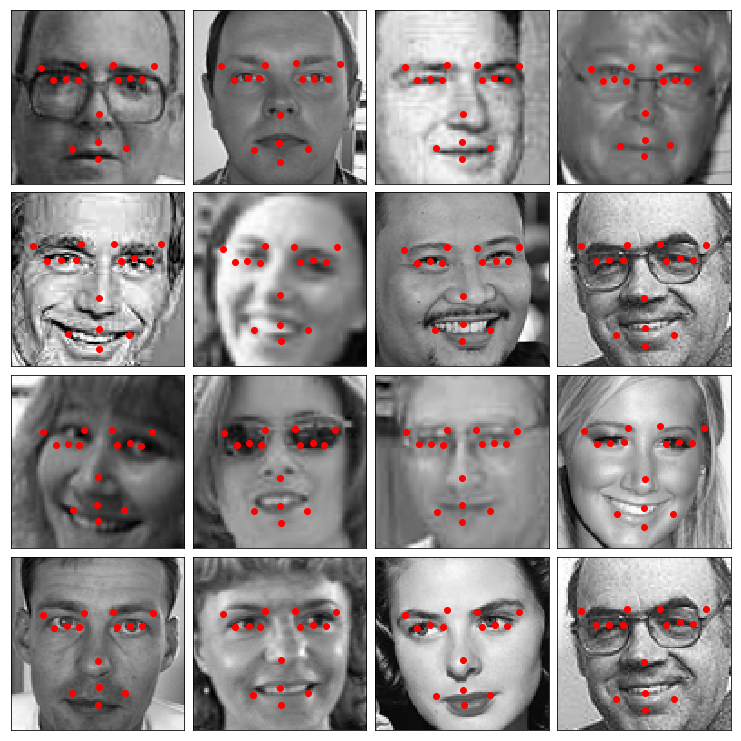

In [88]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, right=1, 
                    bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)
for i, loc in enumerate(idx):
    img = X_test[loc].reshape(96,96)
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[loc].reshape(96,96), cmap='gray')
    ax.scatter(pred[loc][0::2] * 48 + 48, 
               pred[loc][1::2] * 48 + 48, c='r')